In [1]:
import numpy as np, prjlib, plottools as pl, tools_lens, tools_multitracer
from matplotlib.pyplot import *

In [2]:
d = prjlib.data_directory()
pobj = prjlib.analysis_init(t='la',freq='com',fltr='none')
qobj = tools_lens.init_qobj(pobj.stag,'False',rlmin=300,rlmax=4096)
tracer = ['cmb','gal','cib','all']
#tracer = ['all']
#tracer = ['cib']
lab = {'all':'All coadded','cmb':'Internal Reconstruction','gal':'LSST gold','cib':'GNILC CIB'}

In [3]:
rho = {}
for mass in tracer:
    if mass == 'cmb':
        mobj = tools_multitracer.mass_tracer(pobj,qobj,add_gal=[],add_cib=False)
    if mass == 'gal':
        mobj = tools_multitracer.mass_tracer(pobj,qobj,add_cmb=['TT'],add_cib=False)
    if mass == 'cib':
        mobj = tools_multitracer.mass_tracer(pobj,qobj,add_cmb=['TT'],add_gal=[])
    if mass == 'all':
        mobj = tools_multitracer.mass_tracer(pobj,qobj)
    cl_matrix, clnl_matrix = tools_multitracer.get_spectra_matrix( mobj )
    if mass in ['gal','cib']:
        cov = clnl_matrix[1:,1:,:]
        vec = cl_matrix[0,1:,:]
    else:
        cov = clnl_matrix.copy()
        vec = cl_matrix[0,:,:]
    print(np.shape(cov),np.shape(vec))
    weight = tools_multitracer.calculate_multitracer_weights( cov, vec, mobj.lmin )
    rho[mass] = np.zeros(mobj.lmax+1)
    for L in range(1,mobj.lmax+1):
        rho[mass][L] = np.dot(vec[:,L],weight[:,L]) / pobj.kk[L]
    #if mass == 'cib':
    #    clII = tools_multitracer.pad_cls(mobj.lmin,mobj.lmax,np.loadtxt(mobj.fspec+"cl_CIBauto.dat"))
    #    clkI = tools_multitracer.pad_cls(mobj.lmin,mobj.lmax,np.loadtxt(mobj.fspec+"cl_CIBxkappa.dat"))
    #    for L in range(1,mobj.lmax+1):
    #        rho[mass][L] = clkI[L]**2/clII[L]/pobj.kk[L]

(4, 4, 2008) (4, 2008)
(6, 6, 2008) (6, 2008)


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


(1, 1, 2008) (1, 2008)
(11, 11, 2008) (11, 2008)


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


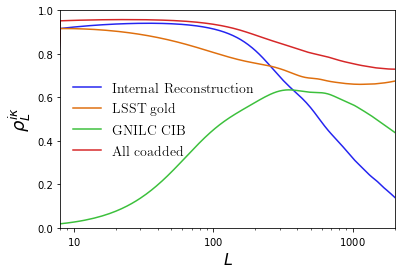

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker
params = {
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    }
fig, ax = plt.subplots(1, 1)
ax.set_xlim(8,2008)
ax.set_ylim(0,1)
ax.set_xscale('log')
ax.set_xlabel(r'$L$',fontsize=16)
ax.set_ylabel(r'$\rho^{i\kappa}_L$',fontsize=18)
plt.rcParams.update(params)
L = np.linspace(0,mobj.lmax,mobj.lmax+1)
for mass in tracer:
    ax.plot(L,np.sqrt(rho[mass]),label=lab[mass])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
legend(loc=6)
savefig('fig_rho.pdf')